In [ ]:
#%tensorflow_version 2.x

In [ ]:
import pandas as pd
import tensorflow as tf
import re
import string
#from nltk import sent_tokenize, word_tokenize
#from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import numpy as np
from tensorflow.keras import optimizers
from tensorflow.python.keras.optimizers import TFOptimizer
import numpy as np
from nltk.corpus import stopwords
import string
from pickle import load
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.convolutional import MaxPooling3D
from keras.layers.convolutional import MaxPooling1D
#from keras.layers.normalization import BatchNormalization
from keras.layers.merge import concatenate
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
import time
start = time.time()

In [ ]:
def clean_doc(doc):
	tokens = doc.split()
	table = str.maketrans('', '', string.punctuation)
	nltk.max_length=300
	tokens = [w.translate(table) for w in tokens]
	tokens = [word for word in tokens if word.isalpha()]
	stop_words = list(set(stopwords.words('english')))
	newStopWords = ['java','com','org']
	stop_words.extend(newStopWords)
	tokens = [w for w in tokens if not w in stop_words]
	tokens = [word for word in tokens if len(word) > 1]
	ps = PorterStemmer()
	tokens=[ps.stem(word) for word in tokens]
	#max_length(tokens)
	return tokens

In [ ]:
def get_all_elements_in_list_of_lists(list):
    count = 0
    for element in list:
        count += len(element)
    return count

In [ ]:
import nltk
nltk.download('stopwords')

import re
from gensim.models import Phrases
from gensim.models import Word2Vec
import gensim
import csv
labeldup=[]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# ***TRAINDATA***

In [ ]:
with open("/content/gdrive/MyDrive/VR_4/train_P1.csv" , "r", encoding='cp437') as f1, open("/content/gdrive/MyDrive/VR_4/train_P2.csv", "r", encoding='cp437') as f2: #, open("train_nn_dup_ec1.csv", "r") as fnd1, open("train_nn_dup_ec2.csv", "r") as fnd2: 
   
        
        reader1 = csv.reader(f1)
        reader2 = csv.reader(f2)
        rownumber = 0    
        traindata = []


        for row1, row2 in zip( reader1,reader2):

             for c1 in row1 :                  #Pull request 1
                 cleanrow1= clean_doc(c1)    
             traindata.append(cleanrow1)
             
             for c2 in row2 :                  #Pull request 2
                 cleanrow2= clean_doc(c2)            
             traindata.append(cleanrow2)


        vocab_size=20
        traindata=np.array(traindata)
        model = gensim.models.Word2Vec(traindata, size=vocab_size, min_count=1,  sg=0) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [ ]:
with open("/content/gdrive/MyDrive/VR_4/train_P1.csv" , "r", encoding='cp437') as f1, open("/content/gdrive/MyDrive/VR_4/train_P2.csv", "r", encoding='cp437') as f2: 
        
        reader1 = csv.reader(f1)
        reader2 = csv.reader(f2)
        rownumber = 0 
        train=[]
        matrix_b1=[]
        matrix_b2=[]
        traindata = []
        train_1=[]
        train_2=[]       
        len_token=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
             
        #Cleaning
        for row1, row2 in zip(reader1, reader2):
             
             
             for c1 in row1 :                 #Pull request 1
                 cleanrow1= clean_doc(c1) 
             for c2 in row2 :                   #Pull request 2
                 cleanrow2= clean_doc(c2)            
             
             
#Pull request 1
        
             matrix_b1=[]         
                     
             for i in cleanrow1 :        
                 
                     matrix1_b= model.wv[i]                     
                     matrix_b1.append(matrix1_b)  

             train_1.append(matrix_b1)           #Pull request 1     
             rownumber = rownumber + 1
             print("train_1",rownumber)
      
 #Pull request 2 
 
             matrix_b2=[]         
        
             for i in cleanrow2 :        
                 
                     matrix2_nb= model.wv[i]                     
                     matrix_b2.append(matrix2_nb) 
          
             
             train_2.append(matrix_b2)          #Pull request 2 
             rownumber = rownumber + 1
             print("train_2",rownumber)
        #f.close()

Streaming output truncated to the last 5000 lines.
train_1 325
train_2 326
train_1 327
train_2 328
train_1 329
train_2 330
train_1 331
train_2 332
train_1 333
train_2 334
train_1 335
train_2 336
train_1 337
train_2 338
train_1 339
train_2 340
train_1 341
train_2 342
train_1 343
train_2 344
train_1 345
train_2 346
train_1 347
train_2 348
train_1 349
train_2 350
train_1 351
train_2 352
train_1 353
train_2 354
train_1 355
train_2 356
train_1 357
train_2 358
train_1 359
train_2 360
train_1 361
train_2 362
train_1 363
train_2 364
train_1 365
train_2 366
train_1 367
train_2 368
train_1 369
train_2 370
train_1 371
train_2 372
train_1 373
train_2 374
train_1 375
train_2 376
train_1 377
train_2 378
train_1 379
train_2 380
train_1 381
train_2 382
train_1 383
train_2 384
train_1 385
train_2 386
train_1 387
train_2 388
train_1 389
train_2 390
train_1 391
train_2 392
train_1 393
train_2 394
train_1 395
train_2 396
train_1 397
train_2 398
train_1 399
train_2 400
train_1 401
train_2 402
train_1 403
t

In [ ]:
#t=np.array(train_2)
#t.shape        
# pad documents to a max length of 300 words

max_length = 300
padded_train_1 = pad_sequences(train_1 , maxlen=max_length, padding='post')
print(padded_train_1)
padded_train_1.shape

padded_train_2 = pad_sequences(train_2 , maxlen=max_length, padding='post')
print(padded_train_2)
padded_train_2.shape

[[[ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  ...
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]]

 [[ 0  0  0 ...  1 -1  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  ...
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]]

 [[ 0  2 -1 ...  2 -1  1]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  ...
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]]

 ...

 [[ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  ...
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]]

 [[ 0  0  0 ...  1  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  ...
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]]

 [[ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  ...
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]]]
[[[ 0  0  

(2662, 300, 20)

# ***Test***

In [ ]:
with open("/content/gdrive/MyDrive/VR_4/test_P1.csv", "r", encoding='cp437') as f1, open("/content/gdrive/MyDrive/VR_4/test_P2.csv", "r", encoding='cp437') as f2:     
        csv
        reader1 = csv.reader(f1)
        reader2 = csv.reader(f2)
        rownumber = 0  
        test=[]
        matrix_b3=[]
        matrix_b4=[]
        test_1=[]
        test_2=[]
        traindata = []
        non_vocab= [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
        MAX_SEQUENCE_LENGTH =300
        
        for row1, row2 in zip(reader1, reader2):
             
             for c1 in row1 :              #Pull request 1
                 cleanrow1= clean_doc(c1)   
             for c2 in row2 :              #Pull request 2
                 cleanrow2= clean_doc(c2)  
             
#Pull request 1
             matrix_b3=[]    
             for i in cleanrow1 :
                 if i in model.wv.vocab:
                     matrix3_b= model.wv[i]                         
                     matrix_b3.append(matrix3_b) 
                     
                 else:
                     matrix_b3.append(non_vocab) 

             test_1.append(matrix_b3)      #Pull request 1
             rownumber = rownumber + 1
           
#Pull request 2 

             matrix_b4=[]    
             for i in cleanrow2 :
                 if i in model.wv.vocab:
                     matrix4_b= model.wv[i]                     
                     matrix_b4.append(matrix4_b) 
                 else:
                     matrix_b4.append(non_vocab) 

             test_2.append(matrix_b4)       #Pull request 2 
             rownumber = rownumber + 1

In [ ]:
#check the shape of testing sets
#import warnings
#warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)
#ts=np.array(test_1)
#ts.shape

#padding 
padded_test_1 = pad_sequences(test_1 , maxlen=max_length, padding='post')
print(padded_test_1)
padded_test_1.shape

padded_test_2 = pad_sequences(test_2 , maxlen=max_length, padding='post')
print(padded_test_2)
padded_test_2.shape
padded_test_1.shape

[[[ 0  0  0 ...  2 -1  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  ...
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]]

 [[ 0  0 -1 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 1  1  0 ...  0  0  1]
  ...
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]]

 [[ 0  2 -1 ...  2 -1  1]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  ...
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]]

 ...

 [[ 0  0  0 ...  1  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  ...
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]]

 [[ 0  0  0 ...  0  0  0]
  [-1  1 -1 ...  3  0  0]
  [ 0  0  0 ...  0  0  0]
  ...
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]]

 [[ 0  0  0 ...  1  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  ...
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]]]
[[[ 0  0  

(666, 300, 20)

In [ ]:
#stack train_1 and train_2 (in pairs)
train=np.stack([padded_train_1, padded_train_2],axis=-1)
train.shape

(2662, 300, 20, 2)

In [ ]:
#stack test_1 and test_2
test=np.stack(([padded_test_1, padded_test_2]),axis=-1)
test.shape

(666, 300, 20, 2)

In [ ]:
import tensorflow as tf
tf.keras.metrics.Precision( thresholds=None, top_k=None, class_id=None, name=None, dtype=None)
tf.keras.metrics.Recall(thresholds=None, top_k=None, class_id=None, name=None, dtype=None)
tf.keras.metrics.FalseNegatives( thresholds=None, name=None, dtype=None)
tf.keras.metrics.FalsePositives(thresholds=None, name=None, dtype=None)
tf.keras.metrics.TrueNegatives(thresholds=None, name=None, dtype=None)
tf.keras.metrics.TruePositives(thresholds=None, name=None, dtype=None)

import tensorflow as tf
import tensorflow 
from keras import layers
from keras import Input
from tensorflow import keras
from keras.layers import Dense
from tensorflow.keras.layers import Reshape

# define the model
import keras.backend as k
import tensorflow as tf

import tensorflow as tf   
tf.get_logger().setLevel('ERROR')

# ***Define CNN model***

In [ ]:
def define_model():
	# channel 1
    #inputs1 = Input(shape=(tt.shape)) 
    inputs1 = Input(shape=(300,20,2)) 
    #inputs2 = Input(shape=(300,20))
    #inputs12=concatenate([inputs1,inputs2])
    #inputs12=tf.stack(([inputs1,inputs2]),axis=-1)
    #inputs12=tf.keras.backend.stack(([inputs1,inputs2]),axis=-1) 
    #(300,20,2) tf.keras.backend.stack(     x,     axis=0 ) 
    #print(inputs1.shape)
    print("inputs1: ",inputs1.shape)
    conv1 = Conv2D(filters=100, kernel_size=(1,20), padding='valid', activation='relu', data_format='channels_last')(inputs1)
    #print(conv1)# "(300,1,100)"
    print("conv1:",conv1.shape)
    x= layers.Reshape((300,100,1))(conv1)
    print("x:",x.shape)
    conv11 = Conv2D(filters=200, kernel_size=(1,100), padding='valid', activation='relu')(x)
    print("conv11:",conv11.shape)
    pool11 = MaxPooling2D(pool_size=(300, 1))(conv11)
    print("pool11:",pool11.shape)
    flat11 = Flatten()(pool11)
    print(flat11.shape)
    # Branch12
    conv12 = Conv2D(filters=200, kernel_size=(2,100), padding='valid', activation='relu')(x)
    print("conv12:",conv12.shape)
    pool12 = MaxPooling2D(pool_size=(299, 1))(conv12)
    print("pool12:",pool12.shape)
    flat12 = Flatten()(pool12)
    # Branch13
    conv13 = Conv2D(filters=200, kernel_size=(3,100), padding='valid', activation='relu')(x)
    print("conv13:",conv13.shape)
    pool13 = MaxPooling2D(pool_size=(298, 1))(conv13)
    print("pool13:", pool13.shape)
    flat13 = Flatten()(pool13)
    # Branch21
    conv2 = Conv2D(filters=100, kernel_size=(2,20), padding='valid', activation='relu', data_format='channels_last')(inputs1)
    print("conv2: ", conv2.shape )
    x2 = layers.Reshape((299,100,1))(conv2)
    print("x2:", x2.shape)
    conv21 = Conv2D(filters=200, kernel_size=(1,100), padding='valid', activation='relu')(x2)
    print("conv21 :",conv21.shape)
    pool21 = MaxPooling2D(pool_size=(299, 1))(conv21)#o2-maxpooling
    print("pool21: ",pool21.shape)
    flat21 = Flatten()(pool21)
    #Branch22
    conv22 = Conv2D(filters=200, kernel_size=(2,100), padding='valid', activation='relu')(x2)
    print("conv22:", conv22.shape)
    pool22 = MaxPooling2D(pool_size=(298, 1))(conv22)
    print("pool22:",pool22.shape)
    flat22 = Flatten()(pool22)
    #Branch23
    conv23 = Conv2D(filters=200, kernel_size=(3,100), padding='valid', activation='relu')(x2)
    print("conv23:",conv23.shape)
    pool23 = MaxPooling2D(pool_size=(297, 1))(conv23)
    print("pool23: ",pool23.shape)
    flat23 = Flatten()(pool23)
    #Branch31
    conv3 = Conv2D(filters=100, kernel_size=(3,20), padding='valid', activation='relu', data_format='channels_last')(inputs1)
    print("conv3",conv3.shape)
    x3 = layers.Reshape((298,100,1))(conv3)
    print("x3",x3.shape)
    conv31 = Conv2D(filters=200, kernel_size=(1,100), padding='valid', activation='relu')(x3)
    print("conv31: ",conv31.shape)
    pool31 = MaxPooling2D(pool_size=(298, 1))(conv31)
    print("pool31",pool31.shape)
    flat31 = Flatten()(pool31)
    #Branch32
    conv32 = Conv2D(filters=200, kernel_size=(2,100), padding='valid', activation='relu')(x3)
    print("conv32: ",conv32.shape)
    pool32 = MaxPooling2D(pool_size=(297, 1))(conv32)
    print("pool32",pool32.shape)
    flat32 = Flatten()(pool32)
    #Branch33
    conv33 = Conv2D(filters=200, kernel_size=(3,100), padding='valid', activation='relu')(x3)
    print("conv33: ",conv33.shape)
    pool33 = MaxPooling2D(pool_size=(296, 1))(conv33)
    print("pool33",pool33.shape)
    flat33 = Flatten()(pool33)
    # merge 'May be merge pools then flatten
    merged = concatenate([flat11, flat12, flat13, flat21, flat22, flat23, flat31, flat32, flat33])
    print("merged: ",merged.shape)
    # interpretation
    dense1 = Dense(300, activation='relu')(merged)
    dense2 = Dense(100, activation='relu')(dense1)
    outputs = Dense(1, activation='sigmoid')(dense2)
    print(outputs.shape)
    #model = Model(inputs=(inputs1, inputs2), outputs=outputs) #think about this
    model = Model(inputs=inputs1, outputs=outputs)
    # compiling the model
    model.compile(optimizer='adam', loss='binary_crossentropy' , metrics=['accuracy'])

       # Print network structure
    print(model.summary())
    return model
model=define_model()

inputs1:  (None, 300, 20, 2)
conv1: (None, 300, 1, 100)
x: (None, 300, 100, 1)
conv11: (None, 300, 1, 200)
pool11: (None, 1, 1, 200)
(None, 200)
conv12: (None, 299, 1, 200)
pool12: (None, 1, 1, 200)
conv13: (None, 298, 1, 200)
pool13: (None, 1, 1, 200)
conv2:  (None, 299, 1, 100)
x2: (None, 299, 100, 1)
conv21 : (None, 299, 1, 200)
pool21:  (None, 1, 1, 200)
conv22: (None, 298, 1, 200)
pool22: (None, 1, 1, 200)
conv23: (None, 297, 1, 200)
pool23:  (None, 1, 1, 200)
conv3 (None, 298, 1, 100)
x3 (None, 298, 100, 1)
conv31:  (None, 298, 1, 200)
pool31 (None, 1, 1, 200)
conv32:  (None, 297, 1, 200)
pool32 (None, 1, 1, 200)
conv33:  (None, 296, 1, 200)
pool33 (None, 1, 1, 200)
merged:  (None, 1800)
(None, 1)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300, 20, 2)  0           []       

In [ ]:
from keras.utils import np_utils

# ***Labeling***

In [ ]:
trainLabels=np.array([1]* 1331 + [0]* 1331)
print("trainLabels:",trainLabels)
testLabels=np.array([1] * 333 + [0] * 333 )

trainLabels: [1 1 1 ... 0 0 0]


# ***Train the model***

In [ ]:
history=model.fit(train, trainLabels,batch_size=64, epochs=100, shuffle= True)### Sh## Shuffle =true

end = time.time()

print(f"Runtime of the program is {end - start}")

Epoch 1/100
42/42 [==============================] - 54s 1s/step - loss: 0.6697 - accuracy: 0.5417
Epoch 2/100
42/42 [==============================] - 52s 1s/step - loss: 0.5881 - accuracy: 0.6612
Epoch 3/100
42/42 [==============================] - 52s 1s/step - loss: 0.5572 - accuracy: 0.6863
Epoch 4/100
42/42 [==============================] - 52s 1s/step - loss: 0.5353 - accuracy: 0.7081
Epoch 5/100
42/42 [==============================] - 52s 1s/step - loss: 0.5057 - accuracy: 0.7344
Epoch 6/100
42/42 [==============================] - 52s 1s/step - loss: 0.4866 - accuracy: 0.7393
Epoch 7/100
42/42 [==============================] - 52s 1s/step - loss: 0.4404 - accuracy: 0.7844
Epoch 8/100
42/42 [==============================] - 52s 1s/step - loss: 0.4255 - accuracy: 0.7904
Epoch 9/100
42/42 [==============================] - 52s 1s/step - loss: 0.3573 - accuracy: 0.8336
Epoch 10/100
42/42 [==============================] - 52s 1s/step - loss: 0.3109 - accuracy: 0.8535
Epoch 11/

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

# ***Evaluate testing set***

In [ ]:
print("Testing: ")
testing_score=model.evaluate(test,testLabels)
print('testing evaluation:', testing_score)

Testing: 
21/21 [==============================] - 3s 148ms/step - loss: 2.8245 - accuracy: 0.7628
testing evaluation: [2.824492931365967, 0.7627627849578857]


In [ ]:
predictions = model.predict(test)
predictions
predictions= (predictions > 0.5)
np.set_printoptions(threshold=np.inf)

In [ ]:
y_pred = [int(val) for val in predictions]
#if y_pred == True:
 #       y_pred= 1
#else:
 #       y_pred= 0
    
#print(y_pred)

print(y_pred)

[1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 

In [ ]:
#accuracy
acc = accuracy_score(testLabels, predictions)
print("accuracy %.2f", (acc * 100))

accuracy %.2f 76.27627627627628


In [ ]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(testLabels, predictions)
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    # cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.show()

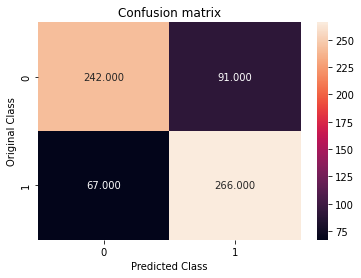

In [ ]:
plot_confusion_matrix(testLabels,predictions)

[[242  91]
 [ 67 266]]


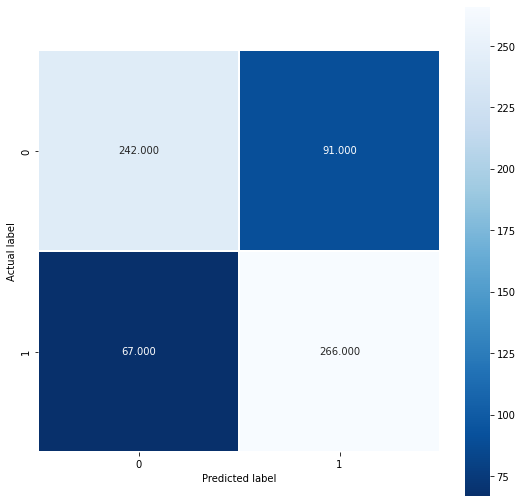

In [ ]:
#confusion matrix
cm = confusion_matrix(testLabels,predictions)
print(cm)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
#all_sample_title = 'Accuracy Score: {0}'.format(score)
#plt.title(all_sample_title, size = 15);

In [ ]:
#classification report
report=classification_report(testLabels,predictions)
print("cm",cm)

cm [[242  91]
 [ 67 266]]


In [ ]:
print("report",report)

report               precision    recall  f1-score   support

           0       0.78      0.73      0.75       333
           1       0.75      0.80      0.77       333

    accuracy                           0.76       666
   macro avg       0.76      0.76      0.76       666
weighted avg       0.76      0.76      0.76       666



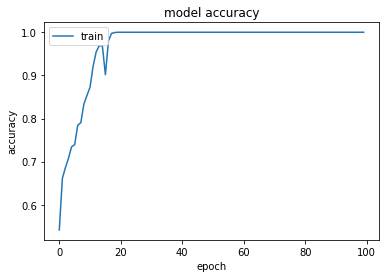

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

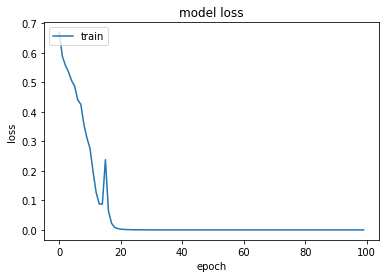

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

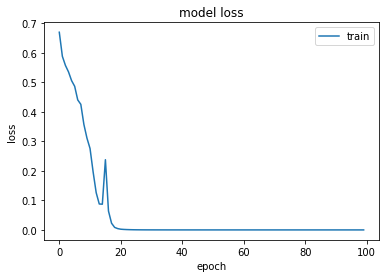

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>


In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()
print(plt)

In [ ]:
features_layer = Model(inputs=model.inputs,outputs=model.get_layer(name="concatenate").output)

print(features_layer)
features_layer.compile(optimizer='adam', loss='binary_crossentropy' , metrics=['accuracy'])
features=features_layer.predict(train)
print(features)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:

'Creation fichier features'
test_labels=pd.DataFrame(features)
test_labels.to_csv('/content/gdrive/MyDrive/train_111.csv')